#####                                Table of Contents.
##### =============================================================================
##### 1. Data Import & Setup.
##### 2. Considering PII.
##### 3. Defining regions for states.
##### 4. Creating an exclusion flag for low-activity customers.
##### 5. Creating a customer profiling variables.
##### 6. Creating visulizations for profiling variables.
##### 7. Aggregating Measures.
##### 8. Comparing customer profiles with regions and departments.
##### 9. Exporting data.
##### =============================================================================

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 1. Importing the dataset

In [2]:
path = r'D:\career foundary\python\Instacart basket analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'ords_prods_customer_merged.pkl'))

In [ ]:
df.head()

In [36]:
# My memory is full, so I created a sample of the dataframe
sample = df.sample(n=1000000, random_state=1)

###  2. Addressing any PII data

In [37]:
## Droping sensitive columns 
sample_df = sample.drop(columns=['first_name', 'last_name'])

In [38]:
sample.shape

(1000000, 33)

In [39]:
sample_df.shape

(1000000, 31)

### 3. Defining regions

In [40]:
sample_df['state'].unique()

array(['Virginia', 'Michigan', 'Wyoming', 'Delaware', 'North Dakota',
       'South Carolina', 'Colorado', 'Tennessee', 'Georgia', 'Washington',
       'Arkansas', 'Oklahoma', 'New Hampshire', 'Iowa', 'Oregon',
       'West Virginia', 'Maryland', 'Connecticut', 'New Mexico',
       'Vermont', 'New York', 'Illinois', 'Alabama', 'Kansas', 'Nebraska',
       'District of Columbia', 'Ohio', 'Nevada', 'North Carolina',
       'New Jersey', 'Louisiana', 'South Dakota', 'Hawaii', 'Mississippi',
       'Minnesota', 'Pennsylvania', 'Idaho', 'Missouri', 'California',
       'Montana', 'Texas', 'Utah', 'Indiana', 'Florida', 'Massachusetts',
       'Maine', 'Rhode Island', 'Wisconsin', 'Alaska', 'Kentucky',
       'Arizona'], dtype=object)

In [41]:
# region: Northeast
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',
    'New York', 'Pennsylvania', 'New Jersey']

# region: Midwest
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
    'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

# region: South
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
    'North Carolina', 'South Carolina', 'Georgia', 'Florida',
    'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
    'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

# region: West
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
    'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [42]:
# Adding a region column
def set_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

In [43]:
sample_df['region'] = sample_df['state'].apply(set_region)

In [30]:
sampled_df.head()

product_id                       product_name  aisle_id  \
13217062       21621       Thicker Style Barbecue Sauce         5   
2688660         5077             100% Whole Wheat Bread       112   
29886654       46595  Original Chocolate Pudding Snacks        71   
22983357       35547                  Organic Baby Kale        83   
16892029       26283                         White Corn        83   

          department_id  prices  order_id  user_id  order_number  \
13217062             13     7.1   1722955    43295            40   
2688660               3     5.2   1424117    61796            30   
29886654             16    10.0   2829011   183804            12   
22983357              4     6.8   1587695    65186            12   
16892029              4     8.9   3065260   120236             6   

          orders_day_of_week  order_hour_of_day  ...  \
13217062                   3                 10  ...   
2688660                    0                  9  ...   
29886654                   5                 18  ...   
22983357                   3                 12  ...   
16892029                   3                 23  ...   

          median_days_between_orders  order_frequency_flag  gender  \
13217062                         6.0     Frequent customer    Male   
2688660                          7.0     Frequent customer  Female   
29886654                        10.0     Frequent customer    Male   
22983357                         8.0     Frequent customer    Male   
16892029                        10.0     Frequent customer  Female   

                 state age joined_data num_dependants     family_status  \
13217062      Virginia  35   5/26/2018              1           married   
2688660       Michigan  34   4/14/2018              2           married   
29886654       Wyoming  80    3/8/2018              0  divorced/widowed   
22983357      Delaware  18   7/21/2019              0            single   
16892029  North Dakota  36  12/16/2017              1           married   

          income   region  
13217062   72959    South  
2688660   100727  Midwest  
29886654   95448     West  
22983357   62632    South  
16892029   86856  Midwest  

[5 rows x 32 columns]

In [44]:
# Crossing variables
region_spending = pd.crosstab(sample_df['region'], sample_df['spending_flag'])

In [45]:
# Checking
region_spending.head()

spending_flag  High spender  Low spender
region                                  
Midwest                4805       230153
Northeast              3307       173145
South                  6529       326433
West                   4836       250792

In [ ]:
#The South region has the highest number of customers, including both high and low spenders, making it the region with the largest total customer numbers.

### 4. Creating an exclusion flag for low-activity customers (customers with less than 5 orders) 

In [46]:
#Flag customers with fewer than 5 orders as 'low_spent' (True), others as 'high_spent' (False)
sample_df['low_spent_exclusion_flag'] = sample_df['max_order'] < 5

In [47]:
# Check out excluded rows
sample_df[sample_df['low_spent_exclusion_flag']].head()

product_id                        product_name  aisle_id  \
23387786       36086  Philadelphia Original Cream Cheese       108   
21615050       33290             Lemon Verbena Dish Soap        74   
13952772       22432                           Coriander       104   
13238751       21709               Sparkling Lemon Water       115   
28773566       44661                  Bicolor Sweet Corn        83   

          department_id  prices  order_id  user_id  order_number  \
23387786             16     7.0   3152041    42346             3   
21615050             17    11.0    801422   201295             3   
13952772             13     8.0   1828995   157534             1   
13238751              7    11.7   1915982    20099             1   
28773566              4    14.4    139072   144746             1   

          orders_day_of_week  order_hour_of_day  ...   order_frequency_flag  \
23387786                   2                 10  ...       Regular customer   
21615050                   0                  9  ...       Regular customer   
13952772                   6                  7  ...  Non-frequent customer   
13238751                   5                  8  ...      Frequent customer   
28773566                   6                  8  ...  Non-frequent customer   

          gender          state  age joined_data num_dependants  \
23387786    Male           Iowa   61   2/13/2020              1   
21615050  Female  West Virginia   54   12/6/2018              3   
13952772    Male        Vermont   35   8/10/2017              3   
13238751  Female     California   40    2/9/2020              2   
28773566  Female       Delaware   21  12/31/2018              2   

                             family_status  income     region  \
23387786                           married  151808    Midwest   
21615050                           married  136550      South   
13952772                           married   78100  Northeast   
13238751                           married   43775       West   
28773566  living with parents and siblings   89614      South   

         low_spent_exclusion_flag  
23387786                     True  
21615050                     True  
13952772                     True  
13238751                     True  
28773566                     True  

[5 rows x 33 columns]

In [48]:
# Excluding low-activity users
sampled_df = sample_df[sample_df['low_spent_exclusion_flag'] == False]

In [49]:
sampled_df.head()

product_id                       product_name  aisle_id  \
13217062       21621       Thicker Style Barbecue Sauce         5   
2688660         5077             100% Whole Wheat Bread       112   
29886654       46595  Original Chocolate Pudding Snacks        71   
22983357       35547                  Organic Baby Kale        83   
16892029       26283                         White Corn        83   

          department_id  prices  order_id  user_id  order_number  \
13217062             13     7.1   1722955    43295            40   
2688660               3     5.2   1424117    61796            30   
29886654             16    10.0   2829011   183804            12   
22983357              4     6.8   1587695    65186            12   
16892029              4     8.9   3065260   120236             6   

          orders_day_of_week  order_hour_of_day  ...  order_frequency_flag  \
13217062                   3                 10  ...     Frequent customer   
2688660                    0                  9  ...     Frequent customer   
29886654                   5                 18  ...     Frequent customer   
22983357                   3                 12  ...     Frequent customer   
16892029                   3                 23  ...     Frequent customer   

          gender         state  age joined_data num_dependants  \
13217062    Male      Virginia   35   5/26/2018              1   
2688660   Female      Michigan   34   4/14/2018              2   
29886654    Male       Wyoming   80    3/8/2018              0   
22983357    Male      Delaware   18   7/21/2019              0   
16892029  Female  North Dakota   36  12/16/2017              1   

             family_status  income   region low_spent_exclusion_flag  
13217062           married   72959    South                    False  
2688660            married  100727  Midwest                    False  
29886654  divorced/widowed   95448     West                    False  
22983357            single   62632    South                    False  
16892029           married   86856  Midwest                    False  

[5 rows x 33 columns]

###  5. Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

In [50]:
sampled_df['num_dependants'].unique()

array([1, 2, 0, 3], dtype=int64)

In [51]:
sampled_df.groupby('family_status')['num_dependants'].unique().reset_index()

family_status num_dependants
0                  divorced/widowed            [0]
1  living with parents and siblings      [3, 2, 1]
2                           married      [1, 2, 3]
3                            single            [0]

In [55]:
# Defining a profile by dependants
def set_profile(row):
    if row['num_dependants'] == 0:
        return 'Single'
    else:
        return 'Has Dependents'

In [57]:
# Applying
sampled_df.loc[:, 'Dependency_status'] = sampled_df.apply(set_profile, axis=1)

In [59]:
# Checking output
sampled_df['Dependency_status'].value_counts()

Dependency_status
Has Dependents    717250
Single            238432
Name: count, dtype: int64

In [60]:
sampled_df.head()

product_id                       product_name  aisle_id  \
13217062       21621       Thicker Style Barbecue Sauce         5   
2688660         5077             100% Whole Wheat Bread       112   
29886654       46595  Original Chocolate Pudding Snacks        71   
22983357       35547                  Organic Baby Kale        83   
16892029       26283                         White Corn        83   

          department_id  prices  order_id  user_id  order_number  \
13217062             13     7.1   1722955    43295            40   
2688660               3     5.2   1424117    61796            30   
29886654             16    10.0   2829011   183804            12   
22983357              4     6.8   1587695    65186            12   
16892029              4     8.9   3065260   120236             6   

          orders_day_of_week  order_hour_of_day  ...  gender         state  \
13217062                   3                 10  ...    Male      Virginia   
2688660                    0                  9  ...  Female      Michigan   
29886654                   5                 18  ...    Male       Wyoming   
22983357                   3                 12  ...    Male      Delaware   
16892029                   3                 23  ...  Female  North Dakota   

          age  joined_data num_dependants     family_status  income   region  \
13217062   35    5/26/2018              1           married   72959    South   
2688660    34    4/14/2018              2           married  100727  Midwest   
29886654   80     3/8/2018              0  divorced/widowed   95448     West   
22983357   18    7/21/2019              0            single   62632    South   
16892029   36   12/16/2017              1           married   86856  Midwest   

          low_spent_exclusion_flag Dependency_status  
13217062                     False    Has Dependents  
2688660                      False    Has Dependents  
29886654                     False            Single  
22983357                     False            Single  
16892029                     False    Has Dependents  

[5 rows x 34 columns]

In [61]:
sampled_df['age'].min()

18

In [62]:
sampled_df['age'].max()

81

In [63]:
#Defining profiles by age
def set_age_group(age):
    if age < 18:
        return 'Minor'
    elif 18 <= age <= 29:
        return 'Young adult'
    elif 30 <= age <= 44:
        return 'Adult'
    elif 45 <= age <= 59:
        return 'Middle aged'
    else:
        return 'Senior'

In [65]:
 #Applying
sampled_df.loc[:, 'age_group'] = sampled_df['age'].apply(set_age_group)

In [66]:
# Checking output
sampled_df['age_group'].value_counts()

age_group
Senior         326924
Middle aged    224697
Adult          223635
Young adult    180426
Name: count, dtype: int64

In [67]:
# Checking income unique values to determine profiles
sampled_df['income'].max()

593901

In [68]:
sampled_df['income'].min()

25911

In [71]:
#Defining profile by income
def set_income_group(income):
    if income < 50000:
        return 'Low (26K–49K)'
    elif 50000 <= income < 150000:
        return 'Middle (50K–149K)'
    else:  
        return 'High (150K and above)'

In [72]:
# Applying
sampled_df.loc[:,'income_group'] = sampled_df['income'].apply(set_income_group)

In [73]:
# checking output
sampled_df['income_group'].value_counts()

income_group
Middle (50K–149K)        731793
High (150K and above)    119739
Low (26K–49K)            104150
Name: count, dtype: int64

In [74]:
# since my RAM is full, I am not able to merge two dataframes of sampled_data and department dataset. 
# So, I manually defined a department dictionary.
department_dictionary = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

In [76]:
# Creating a new column 'department_name' by mapping 'department_id' to department names using the department_dictionary
sampled_df.loc[:, 'department_name'] = sampled_df['department_id'].map(department_dictionary)

In [77]:
#checking
sampled_df.head()

product_id                       product_name  aisle_id  \
13217062       21621       Thicker Style Barbecue Sauce         5   
2688660         5077             100% Whole Wheat Bread       112   
29886654       46595  Original Chocolate Pudding Snacks        71   
22983357       35547                  Organic Baby Kale        83   
16892029       26283                         White Corn        83   

          department_id  prices  order_id  user_id  order_number  \
13217062             13     7.1   1722955    43295            40   
2688660               3     5.2   1424117    61796            30   
29886654             16    10.0   2829011   183804            12   
22983357              4     6.8   1587695    65186            12   
16892029              4     8.9   3065260   120236             6   

          orders_day_of_week  order_hour_of_day  ...  joined_data  \
13217062                   3                 10  ...    5/26/2018   
2688660                    0                  9  ...    4/14/2018   
29886654                   5                 18  ...     3/8/2018   
22983357                   3                 12  ...    7/21/2019   
16892029                   3                 23  ...   12/16/2017   

          num_dependants     family_status  income   region  \
13217062               1           married   72959    South   
2688660                2           married  100727  Midwest   
29886654               0  divorced/widowed   95448     West   
22983357               0            single   62632    South   
16892029               1           married   86856  Midwest   

         low_spent_exclusion_flag Dependency_status    age_group  \
13217062                    False    Has Dependents        Adult   
2688660                     False    Has Dependents        Adult   
29886654                    False            Single       Senior   
22983357                    False            Single  Young adult   
16892029                    False    Has Dependents        Adult   

               income_group department_name  
13217062  Middle (50K–149K)          pantry  
2688660   Middle (50K–149K)          bakery  
29886654  Middle (50K–149K)      dairy eggs  
22983357  Middle (50K–149K)         produce  
16892029  Middle (50K–149K)         produce  

[5 rows x 37 columns]

### 6. Visualizations for region, age groups, income groups, and dependency status

In [80]:
print(sampled_df['age_group'].value_counts())

age_group
Senior         326924
Middle aged    224697
Adult          223635
Young adult    180426
Name: count, dtype: int64


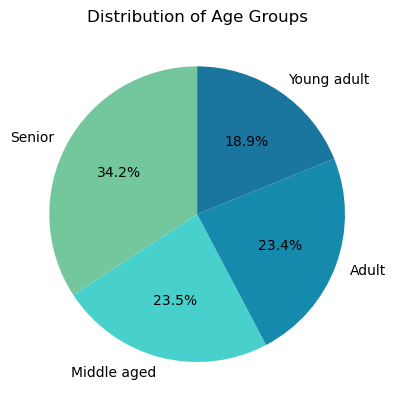

In [85]:
# Creating a pie chart of age_group value counts
Pie_AgeGroup =sampled_df['age_group'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#74c69d', '#48D1CC', '#168aad', '#1a759f']  # Optional: nice colors
)

plt.title('Distribution of Age Groups')
plt.ylabel('')  # Hide y-label
plt.show()

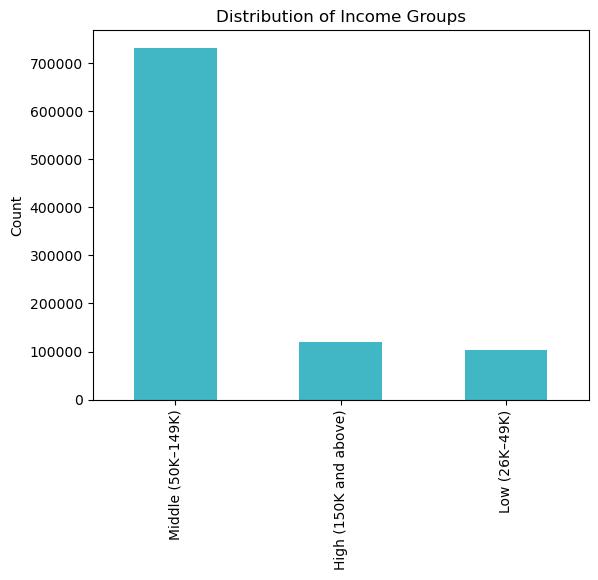

In [86]:
# Visualizing a bar chart for income groups
IncomeGroup_Bar = sampled_df['income_group'].value_counts().plot.bar(color = '#41b6c4')
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


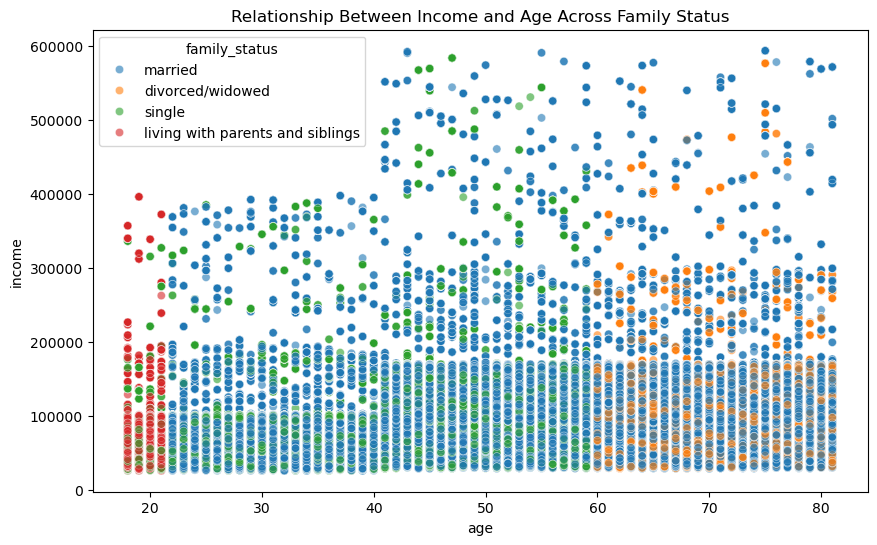

In [87]:
# Creating a scatterplot for relationship between age & income by family status
scatter_Parenting_Age_Income = plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df,
                x='age',
                y='income', 
                hue='family_status',
                sizes=(20, 200),
                alpha=0.6)
plt.title('Relationship Between Income and Age Across Family Status')
plt.show()

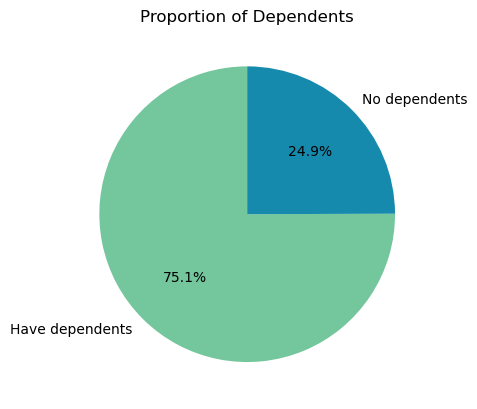

In [173]:
# Creating a pie chart of dependency status
Pie_Dependency = sampled_df['Dependency_status'].value_counts().plot.pie(
    autopct='%1.1f%%', labels= ['Have dependents', 'No dependents'], startangle=90, colors=['#74c69d','#168aad'])
plt.ylabel('')  
plt.title('Proportion of Dependents')
plt.show()

In [88]:
sampled_df.head()

product_id                       product_name  aisle_id  \
13217062       21621       Thicker Style Barbecue Sauce         5   
2688660         5077             100% Whole Wheat Bread       112   
29886654       46595  Original Chocolate Pudding Snacks        71   
22983357       35547                  Organic Baby Kale        83   
16892029       26283                         White Corn        83   

          department_id  prices  order_id  user_id  order_number  \
13217062             13     7.1   1722955    43295            40   
2688660               3     5.2   1424117    61796            30   
29886654             16    10.0   2829011   183804            12   
22983357              4     6.8   1587695    65186            12   
16892029              4     8.9   3065260   120236             6   

          orders_day_of_week  order_hour_of_day  ...  joined_data  \
13217062                   3                 10  ...    5/26/2018   
2688660                    0                  9  ...    4/14/2018   
29886654                   5                 18  ...     3/8/2018   
22983357                   3                 12  ...    7/21/2019   
16892029                   3                 23  ...   12/16/2017   

          num_dependants     family_status  income   region  \
13217062               1           married   72959    South   
2688660                2           married  100727  Midwest   
29886654               0  divorced/widowed   95448     West   
22983357               0            single   62632    South   
16892029               1           married   86856  Midwest   

         low_spent_exclusion_flag Dependency_status    age_group  \
13217062                    False    Has Dependents        Adult   
2688660                     False    Has Dependents        Adult   
29886654                    False            Single       Senior   
22983357                    False            Single  Young adult   
16892029                    False    Has Dependents        Adult   

               income_group department_name  
13217062  Middle (50K–149K)          pantry  
2688660   Middle (50K–149K)          bakery  
29886654  Middle (50K–149K)      dairy eggs  
22983357  Middle (50K–149K)         produce  
16892029  Middle (50K–149K)         produce  

[5 rows x 37 columns]

In [89]:
# Grouping data by day of the week and counting orders per day
orders_by_day = sampled_df.groupby('orders_day_of_week')['order_id'].count().reset_index()

In [90]:
orders_by_day.head(6)

orders_day_of_week  order_id
0                   0    182239
1                   1    166465
2                   2    124172
3                   3    113485
4                   4    111700
5                   5    124680

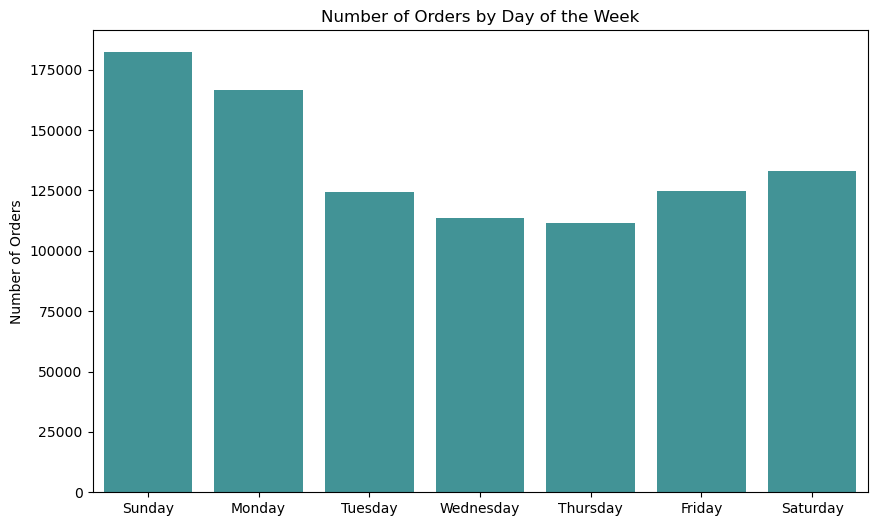

In [91]:
# Creating a bar chart
bar_Orders_Week = plt.figure(figsize=(10,6))
sns.barplot(data=orders_by_day, x='orders_day_of_week', y='order_id', color='#34a0a4')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

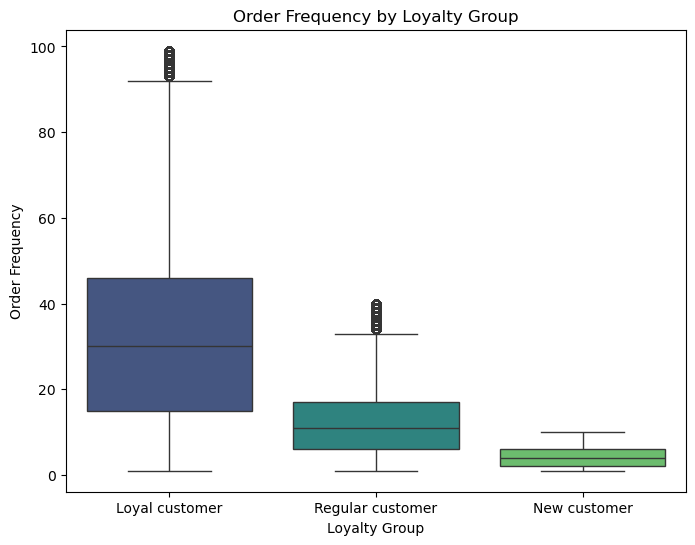

In [285]:
# creating a boxplot showing distrbution of order frequency for each loyalty group
boxplot_Loyal_OrderFreq = plt.figure(figsize=(8,6))
sns.boxplot(
    data=sampled_df,
    x='loyalty_flag',
    y='order_number',
    hue='loyalty_flag',
    palette='viridis' )
plt.title('Order Frequency by Loyalty Group')
plt.xlabel('Loyalty Group')
plt.ylabel('Order Frequency')
plt.show()

In [315]:
# Grouping the data to get average order frequency per loyalty group
avg_order_freq = sampled_df.groupby('loyalty_flag')['order_number'].mean().reset_index()

C:\Users\nasim\AppData\Local\Temp\ipykernel_17204\1736302131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


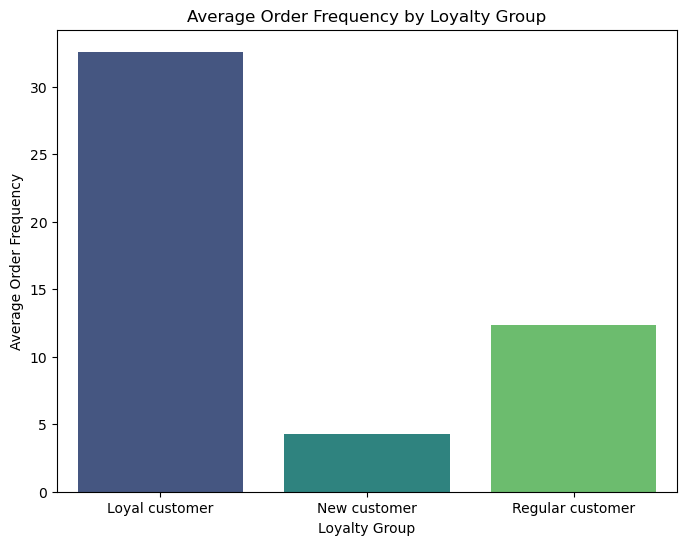

In [316]:
# Creating a bar chart
barplot_Loyal_OrderFreq = plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_order_freq,
    x='loyalty_flag',
    y='order_number',
    palette='viridis')
plt.title('Average Order Frequency by Loyalty Group')
plt.xlabel('Loyalty Group')
plt.ylabel('Average Order Frequency')
plt.show()

In [95]:
# Calculating the average product price for each loyalty group
loyalty_price_summary = sampled_df.groupby('loyalty_flag')['avg_product_price'].mean().reset_index() 

In [96]:
loyalty_price_summary

loyalty_flag  avg_product_price
0    Loyal customer          10.406638
1      New customer          12.916542
2  Regular customer          12.328000

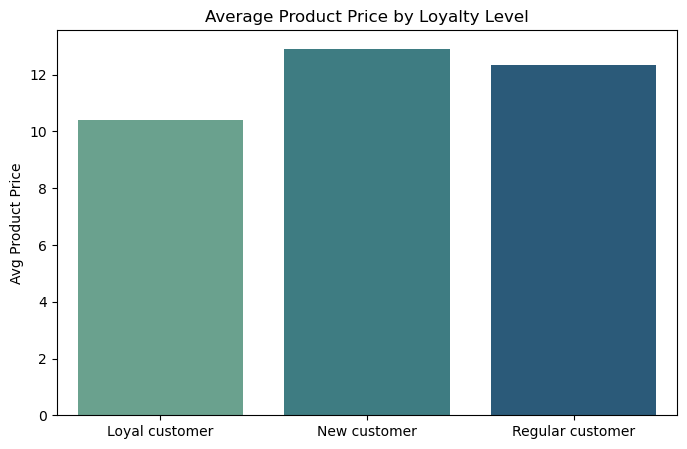

In [100]:
# Creaing a bar chart 
bar_AvgPrice_Loyal = plt.figure(figsize=(8, 5))
sns.barplot(data=loyalty_price_summary, x='loyalty_flag', y='avg_product_price', hue='loyalty_flag', palette='crest')
plt.title('Average Product Price by Loyalty Level')
plt.xlabel('')
plt.ylabel('Avg Product Price')
plt.show()

In [101]:
# Getting the counts of customers in each combination of loyalty level and price range
loyalty_price_table = pd.crosstab(sampled_df['loyalty_flag'], sampled_df['price_range_loc'])
print(loyalty_price_table)

price_range_loc   High-range product  Low-range product  Mid-range product
loyalty_flag                                                              
Loyal customer                  3753              99120               6331
New customer                    2067              46499               2966
Regular customer                6436             153456               9954


In [102]:
# Getting the proportions of customers in each combination of loyalty level and price range
loyalty_price_prop = pd.crosstab(sampled_df['loyalty_flag'], sampled_df['price_range_loc'], normalize='index')
print(loyalty_price_prop)

price_range_loc   High-range product  Low-range product  Mid-range product
loyalty_flag                                                              
Loyal customer              0.034367           0.907659           0.057974
New customer                0.040111           0.902333           0.057556
Regular customer            0.037893           0.903501           0.058606


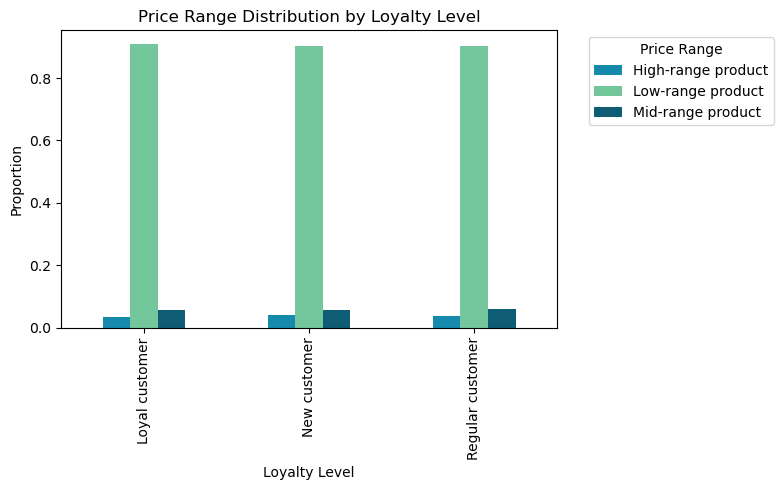

In [103]:
# Creating a bar chat
bar_loyal_PriceProp = loyalty_price_prop.plot(
    kind='bar',  
    color=['#168aad', '#74c69d', '#0f5d75'],   
    figsize=(8, 5))
plt.title('Price Range Distribution by Loyalty Level')
plt.xlabel('Loyalty Level')
plt.ylabel('Proportion')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [307]:
# Crosstab of loyalty and spending
loyalty_spending_ct = pd.crosstab(sampled_df['loyalty_flag'], sampled_df['spending_flag'])

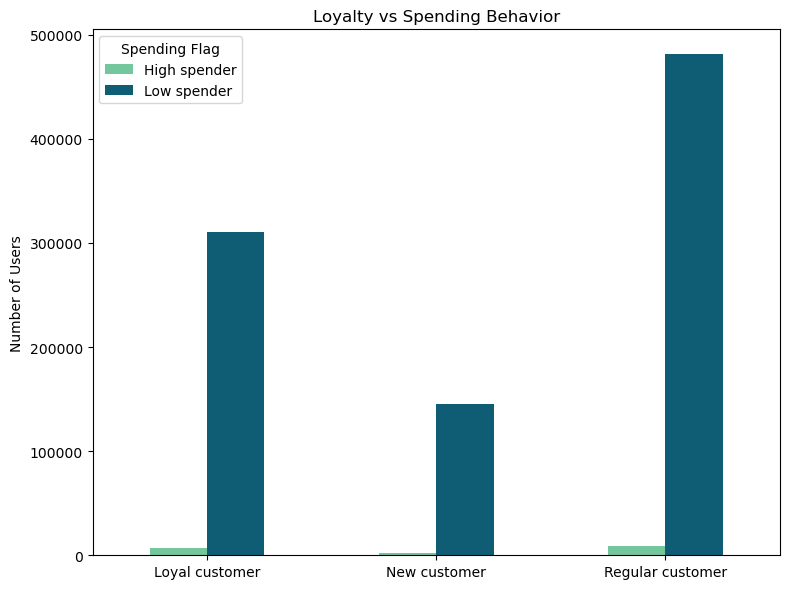

In [313]:
# creating a barchart
bar_LoyalSpending = loyalty_spending_ct.plot(kind='bar', figsize=(8, 6), color=['#74c69d', '#0f5d75'])

loyalty_spendings= plt.title('Loyalty vs Spending Behavior')
plt.xlabel('')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title='Spending Flag')
plt.tight_layout()
plt.show()

In [104]:
# Creating a cross-tabulation table showing the count of customers in each combination of loyalty group and age group
# It helps compare how age distribution varies across different loyalty segments
tab_loyalty_age = pd.crosstab(sampled_df['loyalty_flag'], sampled_df['age_group'], dropna=False)

In [105]:
tab_loyalty_age

age_group          Adult  Middle aged  Senior  Young adult
loyalty_flag                                              
Loyal customer     74375        74600  108828        59476
New customer       34368        35051   50815        27844
Regular customer  114892       115046  167281        93106

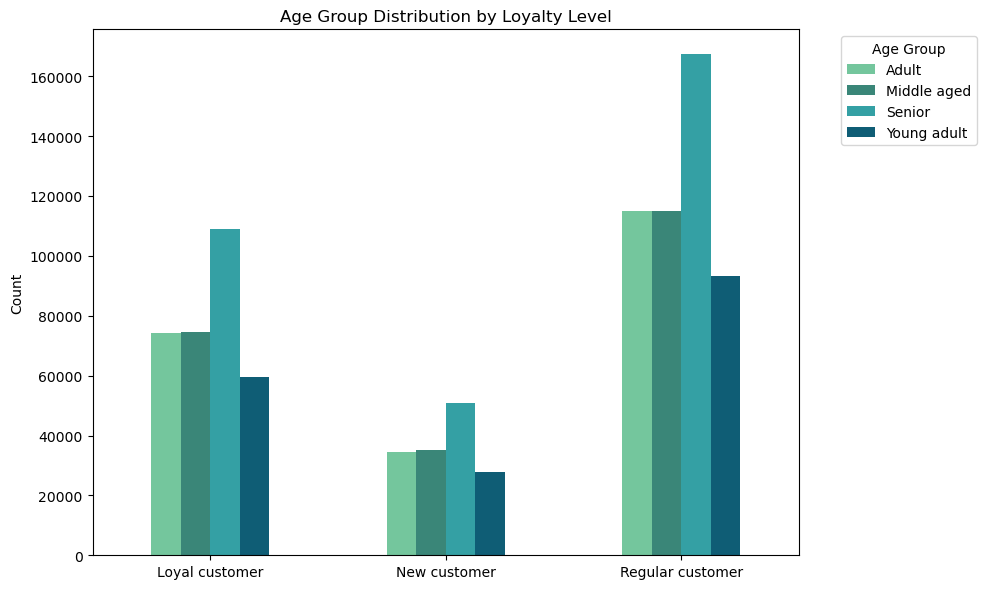

In [106]:
# Plot the side-by-side bar chart
loyalty_Bar = tab_loyalty_age.plot.bar(
    color=['#74c69d', '#3a8678', '#34a0a4', '#0f5d75', '#1a759f'],
    figsize=(10, 6))
plt.title('Age Group Distribution by Loyalty Level') 
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [107]:
# Using Crosstab function on loyalty with age group
Cross_LoyaltyIncome = pd.crosstab(sampled_df['loyalty_flag'], sampled_df['income_group'], dropna = False)

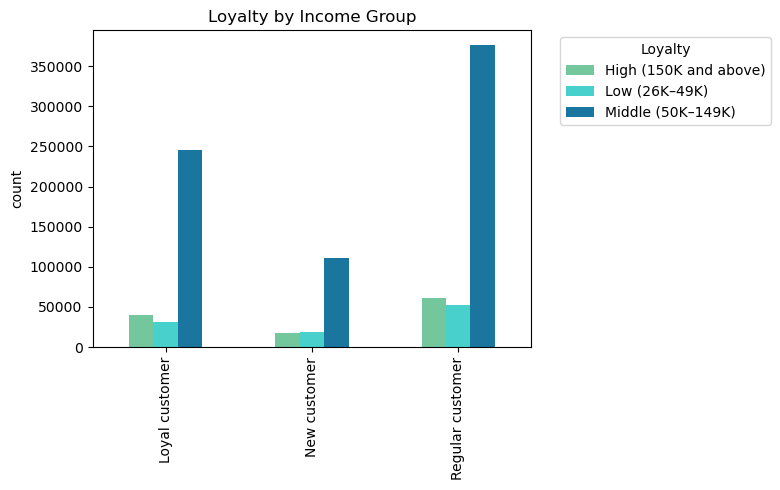

In [108]:
# Visualize a bar chart on loyalty across different Income Groups
BarChart_LoyaltyIncome = Cross_LoyaltyIncome.plot(
    kind='bar', 
    color=['#74c69d', '#48D1CC', '#1a759f'],   
    figsize=(8, 5))
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.legend(title='Loyalty', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [109]:
# Using Crosstab function on loyalty with Family Status
Loyal_FamilyStatus = pd.crosstab(sampled_df['loyalty_flag'], sampled_df['family_status'], dropna = False)

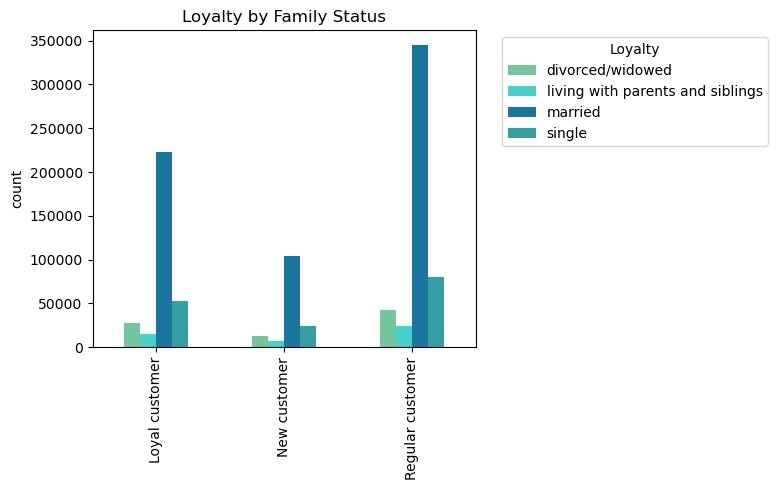

In [301]:
bar_Loyal_FamilyStatus = Loyal_FamilyStatus.plot(
    kind='bar', 
    color=['#74c69d', '#48D1CC', '#1a759f', '#34a0a4'],   
    figsize=(8, 5))
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.legend(title='Loyalty', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [277]:
# Ordering habits by age groups
# Count of total orders per age group
orders_by_age = sampled_df.groupby('age_group')['order_id'].nunique().sort_values()

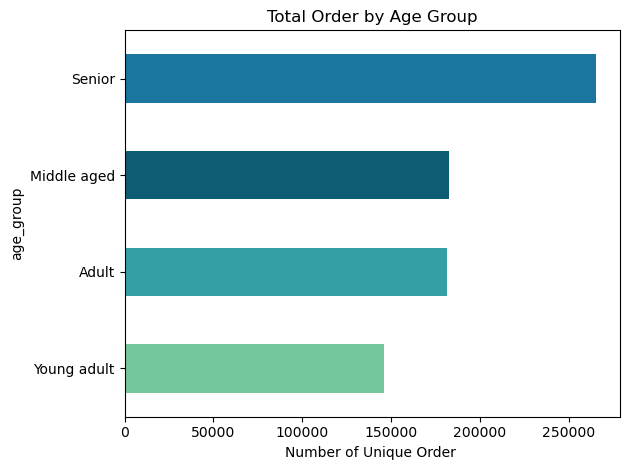

In [288]:
#creating bar chart
bar_OrderAge = orders_by_age.plot(kind='barh', color=['#74c69d', '#34a0a4', '#0f5d75', '#1a759f'],)
plt.xlabel('Number of Unique Order ')
plt.title('Total Order by Age Group')
plt.tight_layout()
plt.show()

In [289]:
# Ordering habits by regions
orders_by_region = sampled_df.groupby('region')['order_id'].nunique().sort_values()

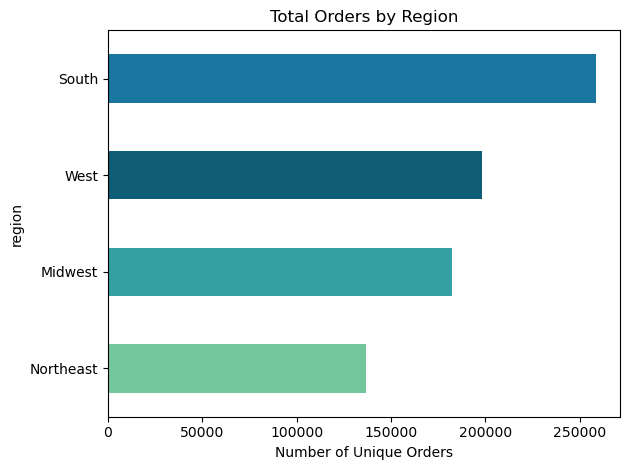

In [290]:
# creating bar charts
bar_OrderRegion = orders_by_region.plot(kind='barh', color=['#74c69d', '#34a0a4', '#0f5d75', '#1a759f'],)
plt.xlabel('Number of Unique Orders')
plt.title('Total Orders by Region')
plt.tight_layout()
plt.show()

In [291]:
# Ordering habits by family Status
orders_by_family = sampled_df.groupby('family_status')['order_id'].nunique().sort_values()

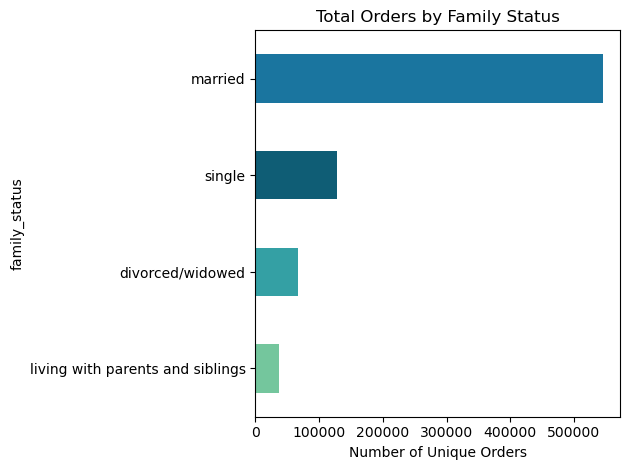

In [292]:
bar_FamilyOrder = orders_by_family.plot(kind='barh', color=['#74c69d', '#34a0a4', '#0f5d75', '#1a759f'],)
plt.xlabel('Number of Unique Orders')
plt.title('Total Orders by Family Status')
plt.tight_layout()
plt.show()

In [111]:
# Counting the number of occurrences for each department and sort them in ascending order
Dep_Name = sampled_df['department_name'].value_counts(ascending = True)

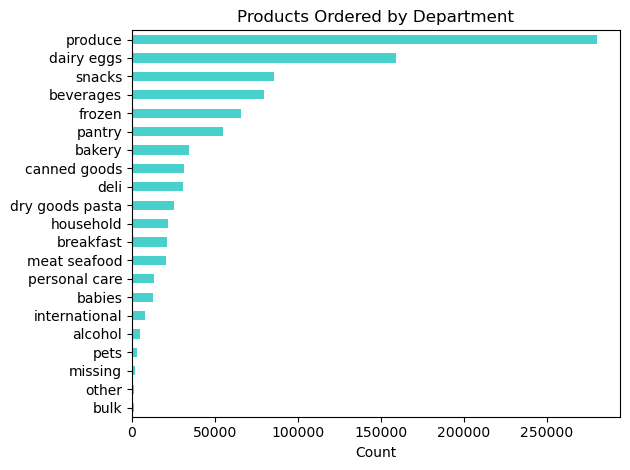

In [188]:
# Creating a bar chart
Department_Products = Dep_Name.plot(kind = 'barh', color = '#48D1CC',
                               xlabel = 'Count', ylabel = '', title='Products Ordered by Department')
plt.tight_layout()  # Adjust layout so labels fit nicely
plt.show()

### 7. Using Aggregation Functions on customer profile level for usage frequency and expenditure

In [113]:
# Checking the column names and data types
sampled_df.dtypes

product_id                      int64
product_name                   object
aisle_id                        int64
department_id                   int64
prices                        float64
order_id                        int64
user_id                         int64
order_number                    int64
orders_day_of_week              int64
order_hour_of_day               int64
days_since_prior_order        float64
first_order                      bool
add_to_cart_order               int64
reordered                       int64
price_range_loc                object
busiest_day                    object
busiest_days                   object
busiest_period_of_day          object
max_order                       int64
loyalty_flag                   object
avg_product_price             float64
spending_flag                  object
median_days_between_orders    float64
order_frequency_flag           object
gender                         object
state                          object
age         

In [114]:
# Aggregate max, mean, min of usage frequency and expenditure per user (customer-profile level)
customer_agg = sampled_df.groupby('user_id').agg({
    'order_number': ['max', 'mean', 'min'],
    'days_since_prior_order': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min'],
    'avg_product_price': ['max', 'mean', 'min']
}).reset_index()

In [115]:
customer_agg

user_id order_number                days_since_prior_order             \
                        max       mean min                    max       mean   
0            1            2   2.000000   2                   15.0  15.000000   
1            2           14   9.000000   4                   28.0  15.500000   
2            3           12   6.666667   1                   15.0  11.000000   
3            7           13   7.800000   2                   30.0  10.800000   
4           10            5   3.000000   1                   23.0  17.500000   
...        ...          ...        ...  ..                    ...        ...   
144596  206203            5   2.833333   2                   30.0  30.000000   
144597  206206           53  36.555556   4                   15.0   5.222222   
144598  206207           14   9.666667   3                   23.0  11.666667   
144599  206208           47  21.857143   3                   16.0   8.214286   
144600  206209           12   7.500000   3                   30.0  27.000000   

             prices                  avg_product_price                      
         min    max       mean   min               max      mean       min  
0       15.0    3.0   3.000000   3.0          6.367797  6.367797  6.367797  
1        8.0   11.7   8.850000   4.5          7.515897  7.515897  7.515897  
2        7.0   12.3   7.666667   1.3          8.197727  8.197727  8.197727  
3        4.0   11.7   8.920000   5.9          7.466990  7.466990  7.466990  
4       12.0   13.6  12.933333  12.3          8.651049  8.651049  8.651049  
...      ...    ...        ...   ...               ...       ...       ...  
144596  30.0   13.4   8.800000   6.1          7.138655  7.138655  7.138655  
144597   1.0   14.3   7.722222   2.1          7.646667  7.646667  7.646667  
144598   4.0    4.9   3.433333   2.2          7.313453  7.313453  7.313453  
144599   0.0   14.4   8.014286   1.4          8.366617  8.366617  8.366617  
144600  18.0   11.5   4.850000   1.8          7.058915  7.058915  7.058915  

[144601 rows x 13 columns]

### 8. Comparing customer profiles with regions and departments.

In [124]:
region_dept = sampled_df.groupby(['age_group', 'income_group', 'family_status', 'region', 'department_name']).size().reset_index(name='order_count')

C:\Users\nasim\AppData\Local\Temp\ipykernel_17204\1168471940.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_DepOrder_Region = sns.catplot(


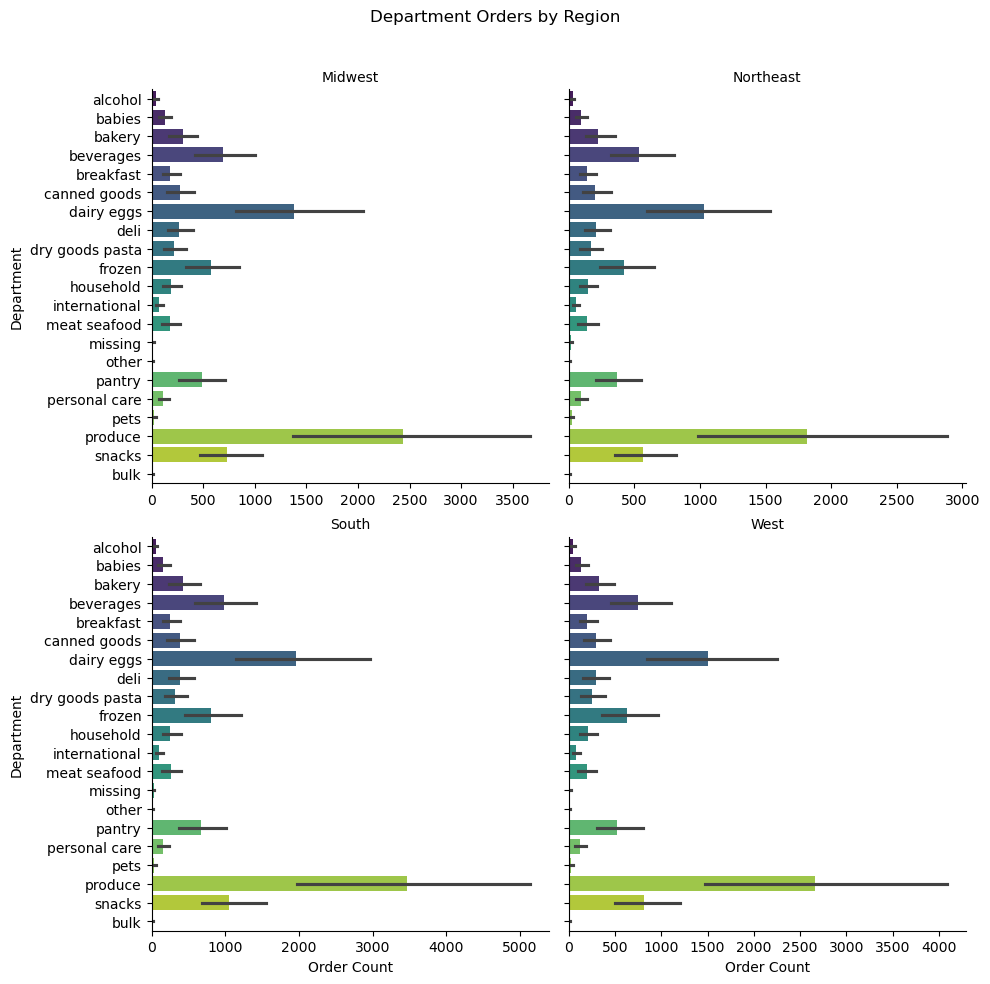

In [296]:
bar_DepOrder_Region = sns.catplot(
    data=region_dept,
    x='order_count',
    y='department_name',
    col='region',
    kind='bar',
    col_wrap=2,
    height=5,
    sharex=False,
    palette='viridis')
bar_DepOrder_Region .set_titles("{col_name}")
bar_DepOrder_Region .set_axis_labels("Order Count", "Department")
plt.subplots_adjust(top=0.9)
bar_DepOrder_Region.fig.suptitle("Department Orders by Region")
plt.show()

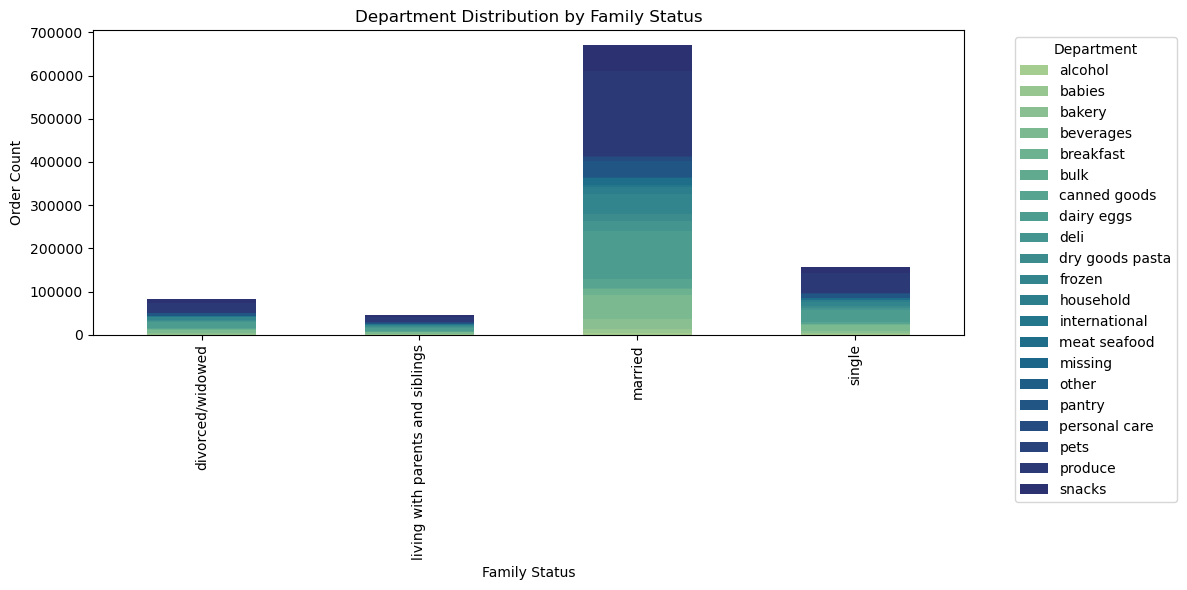

In [164]:
# Creating pivot for family status comparison
pivot_family = region_dept.pivot_table(
    index='family_status',
    columns='department_name',
    values='order_count',
    aggfunc='sum')
# Stacked bar chart
bar_DepOrder_Family = pivot_family.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='crest')
plt.title('Department Distribution by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Order Count')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

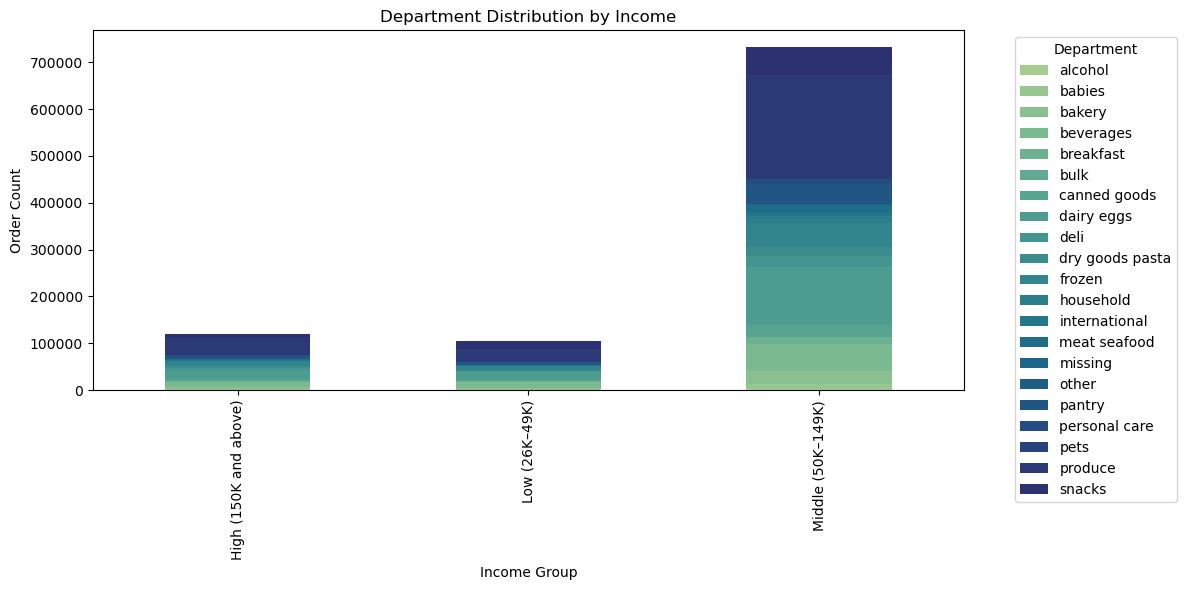

In [163]:
pivot_income = region_dept.pivot_table(
    index='income_group',
    columns='department_name',
    values='order_count',
    aggfunc='sum')
bar_DepOrder_Income = pivot_income.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='crest')
plt.title('Department Distribution by Income')
plt.xlabel('Income Group')
plt.ylabel('Order Count')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [129]:
sampled_df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'joined_data',
       'num_dependants', 'family_status', 'income', 'region',
       'low_spent_exclusion_flag', 'Dependency_status', 'age_group',
       'income_group', 'department_name'],
      dtype='object')

In [154]:
# Selected features for the analysis:
# - 'order_number': Total number of orders placed by the customer
# - 'reordered': Whether the product was reordered (binary indicator)
# - 'add_to_cart_order': Position of the item in the shopping cart (indicates priority)
# - 'age': Age of the customer
# - 'income': Income level of the customer
# - 'days_since_prior_order': Time gap between consecutive orders (recency behavior)
features = [
    'order_number',          
    'reordered',              
    'add_to_cart_order',     
    'age',
    'income',
    'days_since_prior_order'
]

In [155]:
# Aggregate customer-level features from individual order records
customer_df = sampled_df.groupby('user_id').agg({
    'order_number': 'max',  
    'reordered': 'mean',   
    'add_to_cart_order': 'mean', 
    'age': 'first',        
    'income': 'first',    
    'days_since_prior_order': 'mean'}).reset_index()

# Rename columns for clarity and feature naming consistency
customer_df.rename(columns={
    'order_number': 'order_count',
    'reordered': 'reorder_ratio',
    'add_to_cart_order': 'basket_size',
    'days_since_prior_order': 'avg_days_between_orders'
}, inplace=True)

In [158]:
# Drop customers with missing average days between orders (required for clustering)
customer_df_clean = customer_df.dropna(subset=['avg_days_between_orders'])

In [159]:
#importing librraies for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^

In [ ]:
# Features to use
X = customer_df_clean[['order_count', 'reorder_ratio', 'basket_size', 'age', 'income', 'avg_days_between_orders']]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df_clean['cluster'] = kmeans.fit_predict(X_scaled)

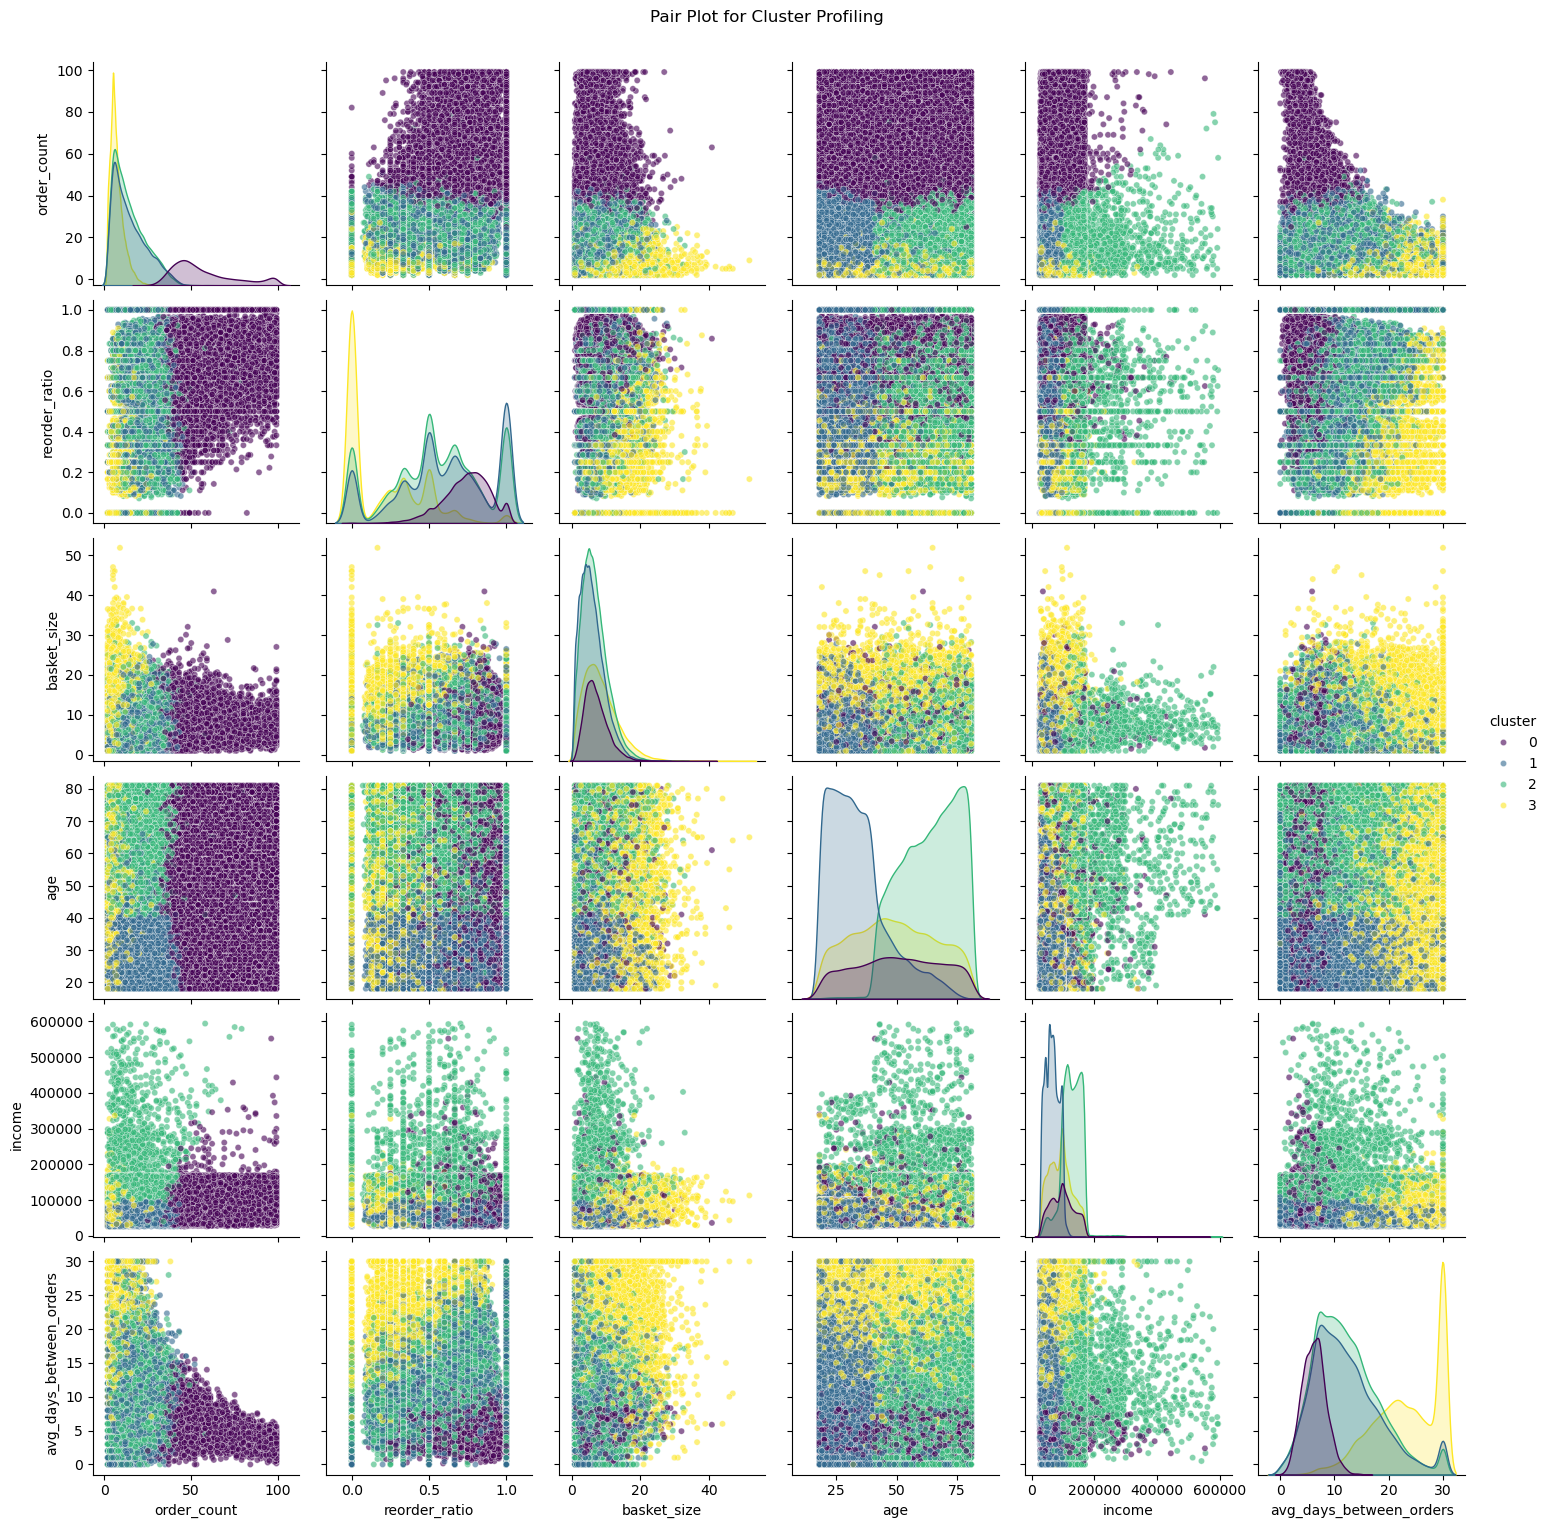

In [305]:
#creating a pairplot for comparisons
Paired_Plot = sns.pairplot(
    customer_df_clean,
    vars=['order_count', 'reorder_ratio', 'basket_size', 'age', 'income', 'avg_days_between_orders'],
    hue='cluster',
    palette='viridis',
    plot_kws={'alpha': 0.6, 's': 20},
    corner=False)
plt.suptitle('Pair Plot for Profiling', y=1.02)
plt.show()

### 9. Exporting the visualizations

In [169]:
Pie_AgeGroup.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Pie_age_groups.png'))

In [170]:
IncomeGroup_Bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'BarChart_income_groups.png'))

In [171]:
scatter_Parenting_Age_Income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Scatterplot_parenting_age_income.png')) 

C:\Users\nasim\AppData\Local\Temp\ipykernel_17204\1964454044.py:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  scatter_Parenting_Age_Income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Scatterplot_parenting_age_income.png'))


In [174]:
Pie_Dependency.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Pie_dependency_status.png'))

In [175]:
bar_Orders_Week.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_orders_week.png'))

In [176]:
boxplot_Loyal_OrderFreq.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Boxplot_loyalty_OrderFrequnecy.png'))

In [177]:
bar_AvgPrice_Loyal.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_average_price_loyalty.png'))

In [178]:
bar_loyal_PriceProp.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_proportion_price_loyalty.png'))

In [314]:
bar_LoyalSpending.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_Loyalty_Spending.png'))

In [179]:
loyalty_Bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_loyalty.png'))

In [180]:
BarChart_LoyaltyIncome.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_loyalty_icome.png'))

In [302]:
bar_Loyal_FamilyStatus.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_loyalty_family_status.png'))

In [293]:
bar_OrderAge.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_OrderAge.png'))

In [294]:
bar_OrderRegion.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_OrderRegion.png'))

In [295]:
bar_FamilyOrder.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_Order_family_status.png'))

In [189]:
Department_Products.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_department_products.png'))

In [297]:
bar_DepOrder_Region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_department_order_region.png'))

In [184]:
bar_DepOrder_Family.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_department_order_family_status.png'))

In [185]:
bar_DepOrder_Income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Barchart_department_order_income.png'))

In [306]:
Paired_Plot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Pair_Plot_Profiling.png'))